 В этом юните мы познакомимся с последним подходом к построению рекомендательных систем — использованием глубокого обучения.

Глубокое обучение (Deep Learning, DL) — это современное и эффективное решение для многих задач машинного обучения, таких как компьютерное зрение или обработка естественного языка. Deep Learning во многих случаях превосходит классические методы, которые мы рассматривали ранее. Поэтому в последнее время глубокое обучение всё чаще применяется и в рекомендательных системах. Многие крупные компании, такие как AirBnB, Google, Home Depot, LinkedIn и Pinterest, используют рекомендательные системы, построенные именно на основе глубокого обучения.

Преимущества использования нейронных сетей

Как правило, DL-модели дают более высокое качество. Стандартные ML-модели проигрывают глубокому обучению, особенно в ситуациях с большим объёмом данных.
DL-модели обладают большей гибкостью. В рамках одной модели вы можете получить ответы на такие вопросы, как «Добавит ли пользователь товар в корзину?», «Начнёт ли он оформление заказа с этим товаром?» или «Купит ли он этот товар?».

Можно включать в модель данные совершенно разных типов, в том числе текстовые данные (используя на них все инструменты NLP) или изображения (используя свёрточные нейронные сети).

Существует множество архитектур нейронных сетей, которые можно использовать для разработки рекомендательных систем. Сейчас мы рассмотрим простейшую архитектуру, чтобы в целом разобраться с принципом создания РС с использованием глубокого обучения.

Прежде чем погрузиться в архитектуру модели, давайте познакомимся с концепцией эмбеддингов.

Эмбеддинг — это пространство низкой размерности, которое отражает взаимосвязь векторов из пространства более высокой размерности.

Чтобы лучше понять эту концепцию, давайте рассмотрим пример создания эмбеддингов пользователей.

Представим, что у нас есть различные данные о пользователях, которые мы хотим преобразовать в векторы с двумя координатами, отражающими всего две характеристики:

степень симпатии к триллерам;

степень симпатии к мелодрамам.

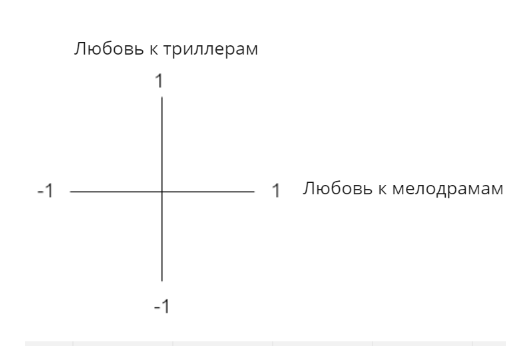

Теперь давайте представим некоторого пользователя Алису. Алиса предпочитает смотреть триллеры и не очень любит мелодрамы. Если в зависимости от её действий и оценок фильмов мы сможем оценить её любовь к триллерам и нелюбовь к мелодрамам в численном эквиваленте, то мы получим вектор, характеризующий предпочтения Алисы в плане жанров:



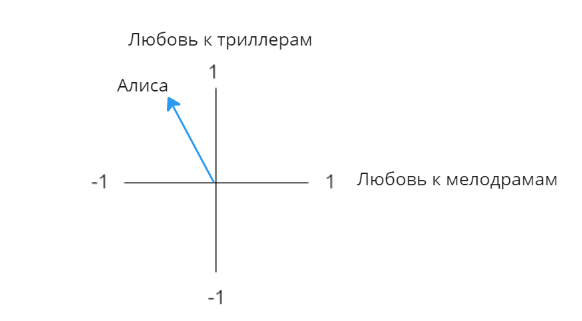

Рассмотрим ещё одного пользователя — Машу. Маша в целом киноман, так что примерно одинаково любит и триллеры, и мелодрамы. По аналогии с Алисой попробуем создать вектор, который характеризует предпочтения Маши.

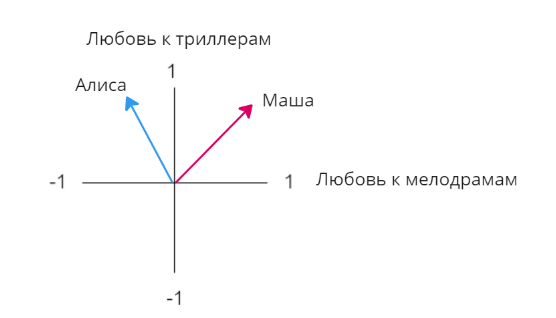

Создав такие векторы-представления для всех пользователей, мы получим полный набор эмбеддингов.

По сути, эмбеддинги уменьшают размерность данных, оставляя осмысленность в их отображении. При таком преобразовании пользователи, предпочтения которых похожи, находятся рядом в плоскости (или пространстве), а пользователи, предпочтения которых отличаются, находятся далеко друг от друга.

Конечно, необязательно использовать для формирования эмбеддинга только два числа: для вектора можно взять любое количество компонент. Причём чем больше будет измерений, тем выше будет точность представления всех особенностей пользователя, и, как следствие, выше будет точность модели. Однако следует понимать, что такое увеличение точности происходит за счёт роста сложности модели и увеличения количества времени, необходимого для её обучения.

Ровно таким же образом мы можем создать эмбеддинги и для фильмов, отобразив информацию о них в пространство меньшей размерности.

Теперь, когда мы разобрались с эмбеддингами, можно переходить к самой архитектуре нейронной сети. Рассмотрим следующий пример архитектуры:

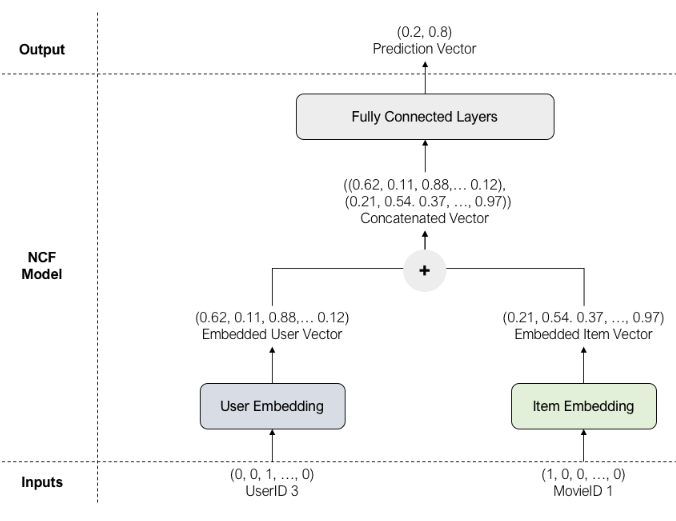

В качестве входных данных для нейронной сети мы передаём вектор характеристик пользователя и вектор для фильма (Inputs на схеме выше).

Из обоих этих векторов получаются эмбеддинги, о которых мы поговорили ранее (обозначены как Embedded User Vector и Embedded Item Vector). Далее эти эмбеддинги проходят через несколько полносвязных слоёв, на выходе из которых они преобразуются в вектор-предсказание. Например, на схеме выше видно, что вероятность первого класса (показывает, что элемент нерелевантен) — 0.2, а второго (показывает, что элемент релевантен) — 0.8. Следовательно, мы делаем выбор в пользу второго и рекомендуем этот продукт пользователю. Собственно, по такому алгоритму и обучается эта нейронная сеть.

Конечно, наше знакомство с глубоким обучением получилось очень поверхностным, но сейчас для вас важно просто понимать его принцип.

Давайте разберём несложную задачу, при решении которой мы обучим настоящую нейронную сеть и используем её для создания рекомендаций.

Мы будем использовать модуль tensorflow, в котором реализовано много полезных методов для имплементации (внедрения) нейронных сетей. Установим его:

In [1]:
!pip install tensorflow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Для начала импортируем из него функции, которые понадобятся нам для решения задачи:

In [2]:
from tensorflow.keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from tensorflow.keras.models import Model

Мы будем использовать данные из предыдущего юнита, но лишь те, которые содержат информацию об оценках, выставленных книгам пользователями. Загрузим данные:

In [3]:
import pandas as pd


In [4]:
df = pd.read_csv('ratings.csv')

Разбейте данные на обучающую и тестовую выборки в отношении 4:1. В качестве значения параметра random_state возьмите число 42.

Сколько объектов теперь находится в обучающей выборке?

In [5]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)
print(train.shape)

(785404, 3)


Сколько в наборе данных уникальных книг?

In [6]:
len(df.book_id.unique())

10000

Сколько в наборе данных уникальных пользователей?

In [7]:
len(df.user_id.unique())

53424

В первую очередь нам необходимо создать эмбеддинги для книг и пользователей. Создаём эмбеддинги для книг:

In [8]:
n_books=len(df.book_id.unique())
n_users=len(df.user_id.unique())

In [9]:
book_input = Input(shape=[1], name="Book-Input")
book_embedding = Embedding(n_books+1, 5, name="Book-Embedding")(book_input)
book_vec = Flatten(name="Flatten-Books")(book_embedding)

Сначала мы задаём размерность входного слоя. После этого определяем размер эмбеддинга: в этом случае снижаем размерность до 5. Далее мы разворачиваем результат в массив с одним измерением с помощью слоя Flatten().

Делаем то же самое для пользователей:

In [10]:
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

Теперь, когда мы создали представления как для книг, так и для пользователей, нам необходимо соединить их:

In [11]:
conc = Concatenate()([book_vec, user_vec])
conc

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'concatenate')>

Далее начинаем «собирать» нашу нейронную сеть из слоёв. Dense обозначает полносвязный слой. Также мы обозначаем для него количество нейронов и данные, которые идут на вход.

In [12]:
fc1 = Dense(128, activation='relu')(conc)
fc2 = Dense(32, activation='relu')(fc1)
out = Dense(1)(fc2)

Собираем модель: передаём входные данные для книг и пользователей, а также архитектуру нейронной сети:

In [13]:
model2 = Model([user_input, book_input], out)

Также нам необходимо задать алгоритм оптимизации и метрику, которую мы будем оптимизировать. В этом случае будем использовать метод adam и хорошо известную вам среднеквадратичную ошибку:

In [14]:
model2.compile(optimizer = 'adam',loss =  'mean_squared_error')

Теперь будем обучать нашу модель:

In [15]:
history = model2.fit([train.user_id, train.book_id], train.rating, epochs=5, verbose=1)

Epoch 1/5
24544/24544 [==============================] - 83s 3ms/step - loss: 0.7978
Epoch 2/5
24544/24544 [==============================] - 79s 3ms/step - loss: 0.6886
Epoch 3/5
24544/24544 [==============================] - 79s 3ms/step - loss: 0.6566
Epoch 4/5
24544/24544 [==============================] - 79s 3ms/step - loss: 0.6318
Epoch 5/5
24544/24544 [==============================] - 76s 3ms/step - loss: 0.6102


В параметр эпох передаём значение 5: у нас будет реализовано пять эпох — пять обучений нейронной сети. На каждой из эпох обновляются веса для минимизации ошибки.

Теперь можно оценить качество:

In [16]:
model2.evaluate([test.user_id, test.book_id], test.rating)

6136/6136 [==============================] - 7s 1ms/step - loss: 0.7093


0.709324300289154

Примечание. К сожалению, результаты этого алгоритма нельзя зафиксировать стандартным ramdom_state, к которому мы привыкли: применяемые методы не используют такой параметр. Поэтому мы опустим здесь сравнение результатов, однако посмотрим, как можно настроить нейронную сеть.

Обычно для улучшения качества модели каким-то образом модифицируют нейронную сеть: дополняют её, увеличивают время обучения. Добавим ещё один полносвязный слой с восемью нейронами после полносвязного слоя с 32 нейронами. Обучим нейронную сеть, реализовав десять эпох:

In [ ]:
fc1 = Dense(128, activation='relu')(conc)
fc2 = Dense(32, activation='relu')(fc1)
fc3 = Dense(8, activation='relu')(fc2)
out = Dense(1)(fc3)

model2 = Model([user_input, book_input], out)
model2.compile('adam', 'mean_squared_error')
result = model2.fit([train.user_id, train.book_id], train.rating, epochs=10, verbose=1)
model2.evaluate([test.user_id, test.book_id], test.rating)

Epoch 1/10
24544/24544 [==============================] - 85s 3ms/step - loss: 0.6254
Epoch 2/10
24544/24544 [==============================] - 80s 3ms/step - loss: 0.5772
Epoch 3/10
24544/24544 [==============================] - 79s 3ms/step - loss: 0.5559
Epoch 4/10
24544/24544 [==============================] - 80s 3ms/step - loss: 0.5378
Epoch 5/10
24544/24544 [==============================] - 78s 3ms/step - loss: 0.5235
Epoch 6/10
 7160/24544 [=======>......................] - ETA: 23:14 - loss: 0.4862

Качество получившейся модели не будет выше качества предыдущей, так как усложнение сети или увеличение количества эпох не всегда даёт высокое качество. Здесь главное, что вы научились корректировать архитектуру нейронной сети.

Теперь вы познакомились со всеми методами построения рекомендательных систем — самое время перейти к последнему, практическому юниту.